# Data Science in Visual Studio Code Tutorial
following the [equally-named article](https://code.visualstudio.com/docs/datascience/data-science-tutorial) from the VS Code documentation because I am getting so annoyed with debugging Jupyter notebooks (in VS Code and on Google Colab) that I've decided to read some tutorials. Maybe working through a simple guided project will help me. Got a feeling it won't, though. Oh look, here's an emoji 🤷.

Required packages

In [1]:
pip install pandas jupyter seaborn scikit-learn keras tensorflow

Download [sample Titanic data](https://hbiostat.org/data/repo/titanic3.csv) as CSV and place in same directory as this notebook

In [2]:
!mkdir tmp
!curl https://hbiostat.org/data/repo/titanic3.csv > tmp/titanic3.csv

mkdir: tmp: File exists
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  114k  100  114k    0     0   160k      0 --:--:-- --:--:-- --:--:--  162k


Data exploration

In [3]:
import pandas as pd
import numpy as np
data = pd.read_csv('tmp/titanic3.csv')

In [4]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

In [5]:
data = data.astype({"pclass": np.bool8, "survived": np.bool8})

<AxesSubplot:xlabel='survived', ylabel='fare'>

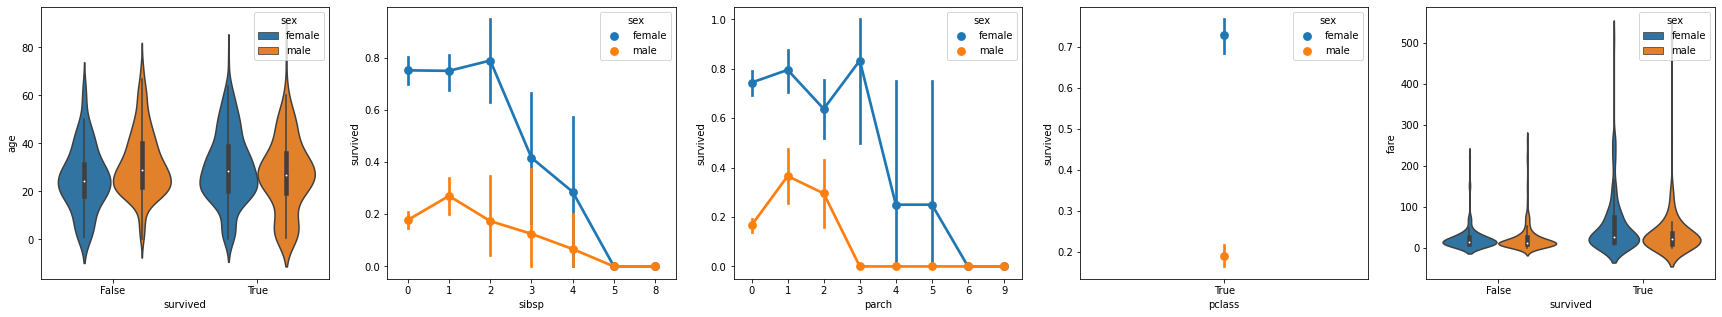

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot( x="survived",   y="age",        hue="sex",  data=data,  ax=axs[0])
sns.pointplot(  x="sibsp",      y="survived",   hue="sex",  data=data,  ax=axs[1])
sns.pointplot(  x="parch",      y="survived",   hue="sex",  data=data,  ax=axs[2])
sns.pointplot(  x="pclass",     y="survived",   hue="sex",  data=data,  ax=axs[3])
sns.violinplot( x="survived",   y="fare",       hue="sex",  data=data,  ax=axs[4])

In [7]:
data.replace({'male': 1, 'female': 0}, inplace=True)

In [8]:
data.corr().abs()[["survived"]]

,survived
pclass,NaN
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [9]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,NaN
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN
relatives,0.201719


In [10]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

Model training
https://code.visualstudio.com/docs/datascience/data-science-tutorial#_train-and-evaluate-a-model

divide up the dataset into training and validation data

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

normalize the inputs

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

Naïve Bayes algorithm

In [13]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

now try it against the test data set

In [14]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7751196172248804


as a **neural network (NN)**

define model

In [15]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

2022-07-21 12:41:49.748839: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


add layers of NN

- The first layer will be set to have a dimension of 5, since you have five inputs: sex, pclass, age, relatives, and fare.
- The last layer must output 1, since you want a 1-dimensional output indicating whether a passenger would survive.
- The middle layer was kept at 5 for simplicity, although that value could have been different.

In [16]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


compile model

In [18]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 1s 5ms/step - loss: 0.6924 - accuracy: 0.5789
Epoch 2/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6902 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6865 - accuracy: 0.5873
Epoch 4/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6801 - accuracy: 0.6041
Epoch 5/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.7201
Epoch 6/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.7715
Epoch 7/50
27/27 [==============================] - 0s 3ms/step - loss: 0.6321 - accuracy: 0.7727
Epoch 8/50
27/27 [==============================] - 0s 4ms/step - loss: 0.6080 - accuracy: 0.7715
Epoch 9/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5846 - accuracy: 0.7703
Epoch 10/50
27/27 [==============================] - 0s 3ms/step - loss: 0.5634 - accuracy: 0.7703
Epoch 11/50
27/27 [

evaluate on test data

In [19]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 2ms/step
0.6124401913875598


Didn't help but was fun.  
Ok, bye 👋